<h1>practice project to get my hands on machine learning project workflow</h1> 


## looking at the bigger picture 

this looks like a regression model since we gotta predict a actaul median house price based on the parameters provided to us 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('housing 3.csv')

taking a look at the data to see what all features do we actually have here 


In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


getting info on the data , and its features 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**inference from the above info is that , total_bedrooms has some null values present, 207 to be percise**
 
 **and ocean_proximity is only non numerical value**

In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 plotting a histogram of the each numerical attribute to get more insights

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

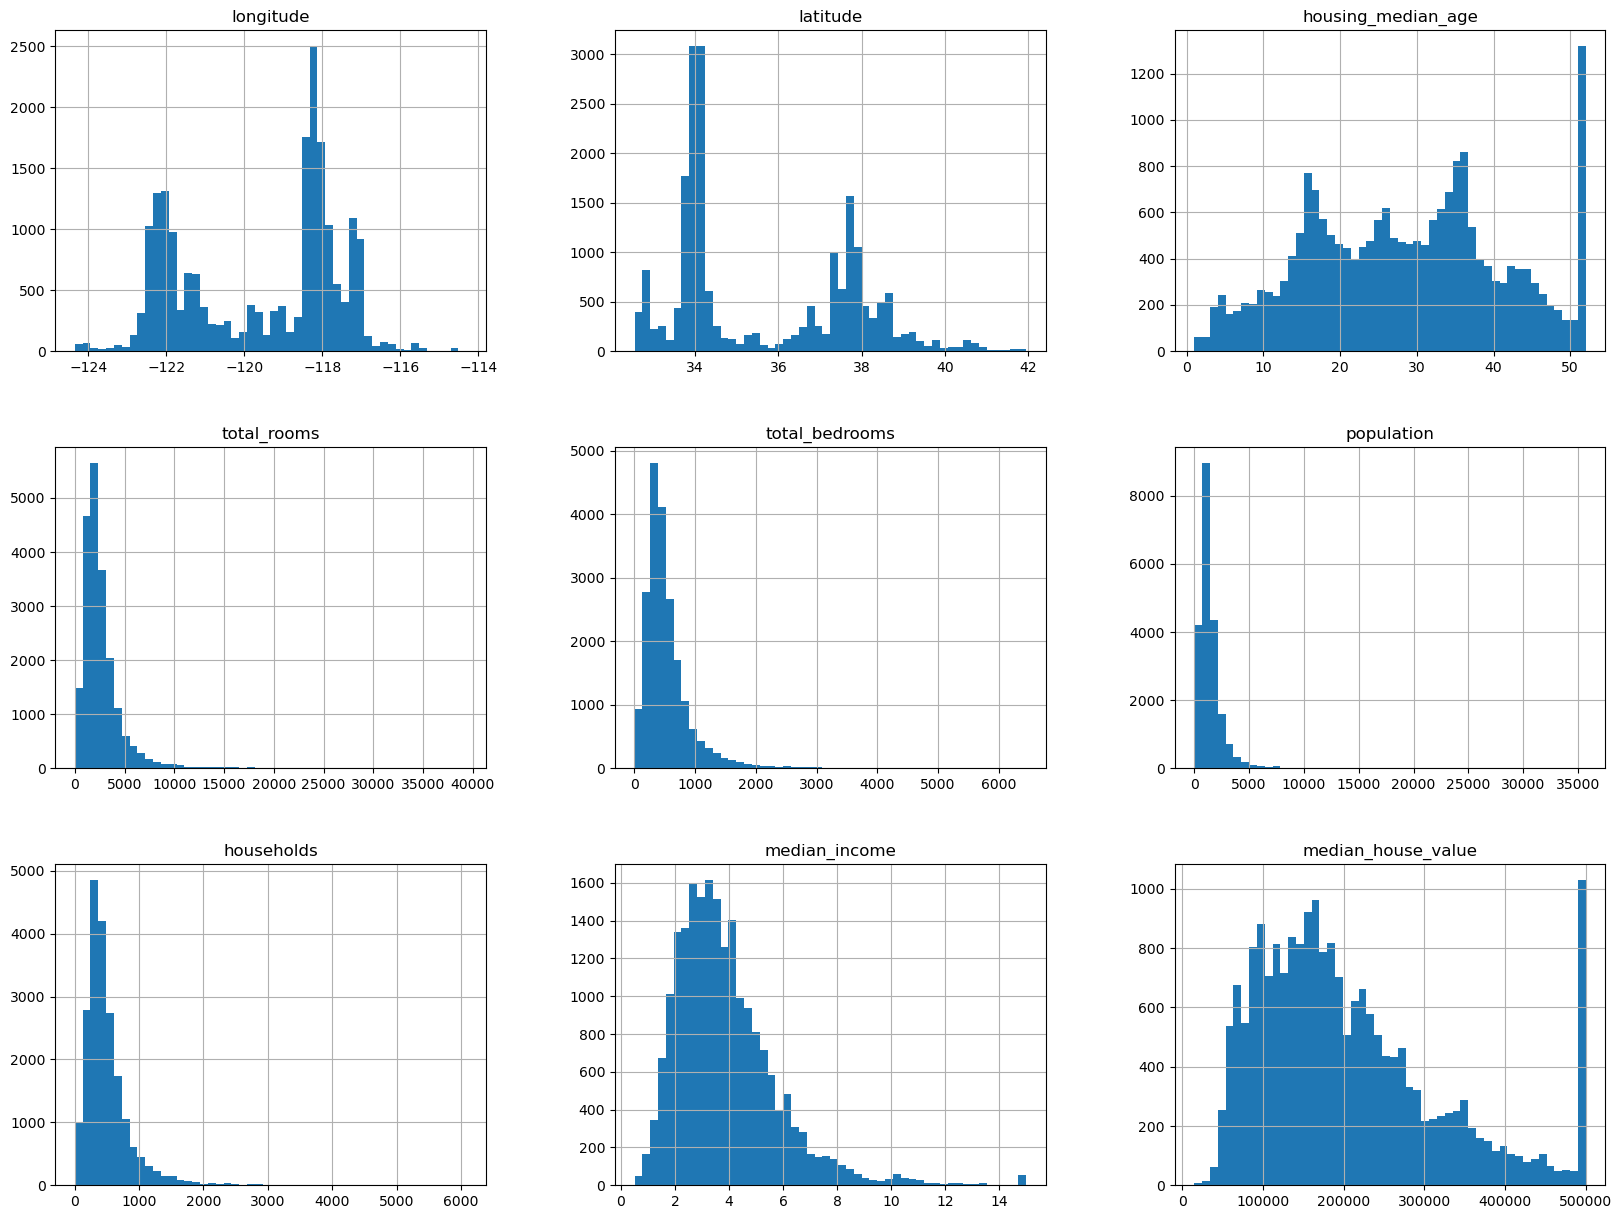

In [8]:
df.hist(bins=50,figsize=(20,15))


1. median income is capped to 15 ,and is represented in 10s of thousands of dollars values 

2. the median age, median house values were also capped 

3. the attributes have diffrent scales here 

4. histograms are tail heavy so the model might have problems detecting patterns here 

In [9]:
## creating a test set before doing anything with the data 

In [10]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42,stratify=None)

In [11]:
## now since we have crucial numerical attribute , (median income ) we need to create income 
# categories attribute to structe the gaps well 

In [12]:
## using the pd.cut() to cut the median income category into 5 category 
# 1 represents 0-1.5(0 -15000 dollars of income) and so on 

In [13]:
df['income_cat']=pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])## cuts the median income across bins and give the bins lables 

<Axes: >

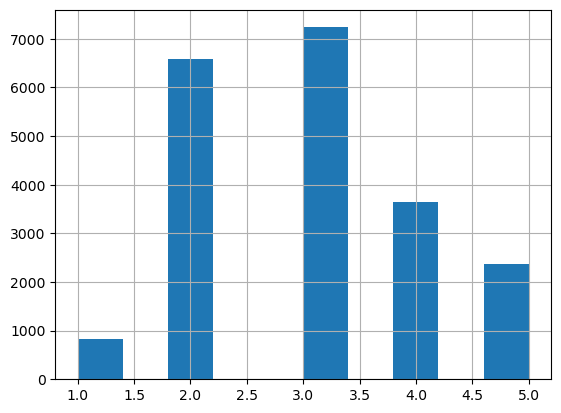

In [14]:
df['income_cat'].hist()

stratisfied sampleling based on the income categoy

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)## provides train/test indices to split data in train/test sets 


for train_index,test_index in split.split(df,df['income_cat']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]
    

In [16]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [17]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

we can see the proportion of each class is smae in train and test split and it is also same in df 

**now removing the income_cat attribute**

In [18]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

## discover and visualise the data to gain insights 

In [19]:
housing = strat_train_set.copy()

visualising the geographical data 

<Axes: xlabel='longitude', ylabel='latitude'>

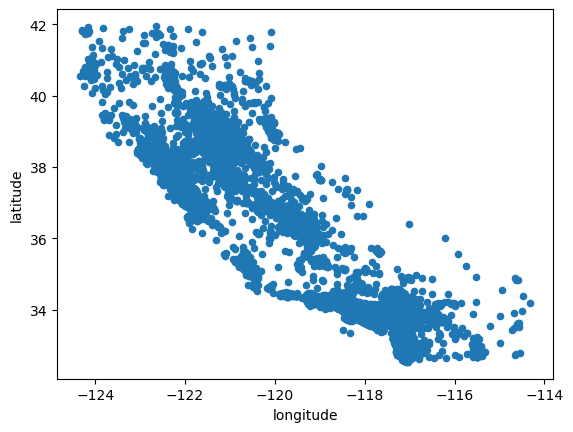

In [20]:
housing.plot(kind='scatter',x='longitude',y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

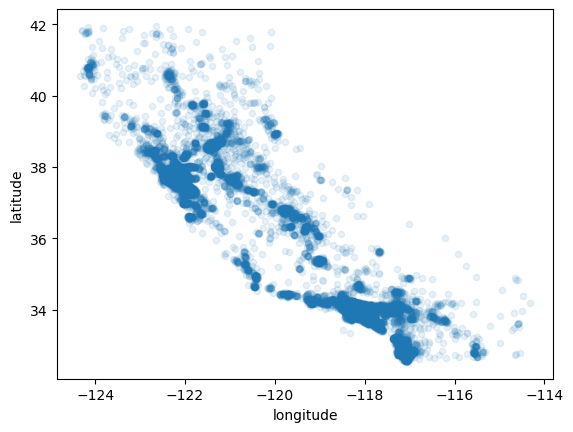

In [21]:
## setting alpha to 0.1 to see the denser points easily 
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)


Now let’s look at the housing prices . The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):

<Axes: xlabel='longitude', ylabel='latitude'>

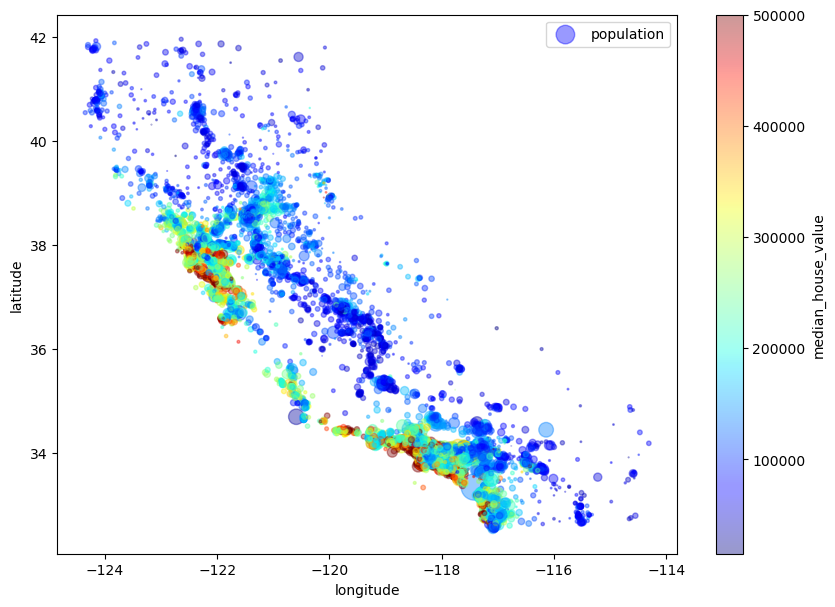

In [22]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing['population']/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

In [23]:
## this image clearly tells us the housing prices are affected by the location 


looking for coorelations

In [24]:
corr_matrix= df.drop(columns=["ocean_proximity"]).corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.010690
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.085528
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.146920
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.220528
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.015662
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.025809
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.038490
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.902750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.643892
income_cat,-0.010690,-0.085528,-0.146920,0.220528,0.015662,0.025809,0.038490,0.902750,0.643892,1.000000


In [25]:
## since we have a catergorial attribute present , we need to convert it into numerical data , we could have done that later 
# but to get corr matrix we have to do it rn , 

<Axes: >

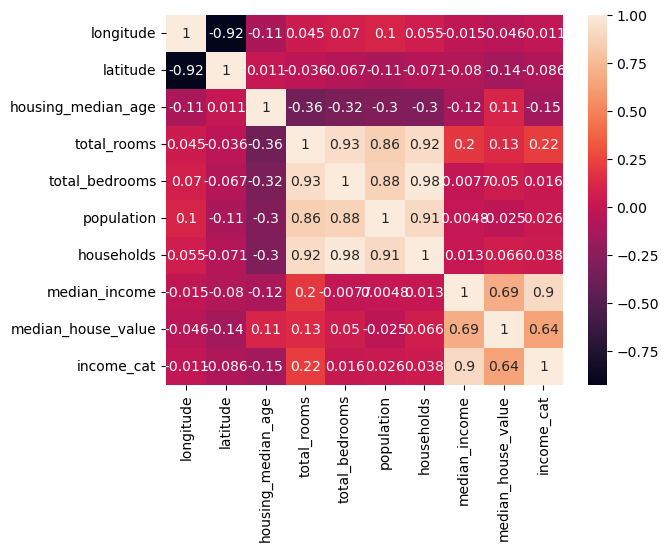

In [26]:
sns.heatmap(corr_matrix,annot=True)
# plt.matshow(corr_matrix)

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up

When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north).

<Axes: xlabel='median_income', ylabel='median_house_value'>

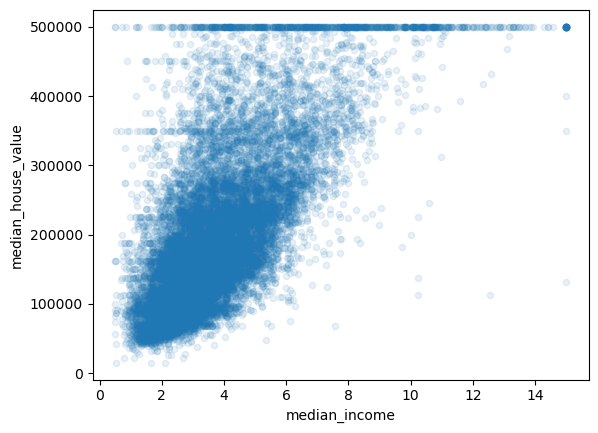

In [28]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

1. we clearly see the the correlation is indeed very strong , and the upward trend points are not to dispersed 
2. the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000 but this plot also reveals other less obvious straight lines , a horizontal line around $450,000 another around $350,000 perhaps one around $280,000 

 <b>experimenting with Attribute combinations</b> 

1. before actually preparing the data for Machine Learning algorithms try out various attribute combinations
2. the total number of district is not very useful if you don't know many households there are 
3. what you really want is the number of rooms per household 
4. similarly the total number of bedrooms by itself is not very useful ; you probably want to compare it to the number of rooms 
5. and the population per household also seems like an intersting attribute combination to look at , 

In [29]:
housing 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [30]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedroom_per_room"]=housing['total_bedrooms']/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]



In [31]:
corr_matrix= df.drop(columns=["ocean_proximity"]).corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.010690
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.085528
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.146920
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.220528
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.015662
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.025809
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.038490
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.902750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.643892
income_cat,-0.010690,-0.085528,-0.146920,0.220528,0.015662,0.025809,0.038490,0.902750,0.643892,1.000000


<Axes: >

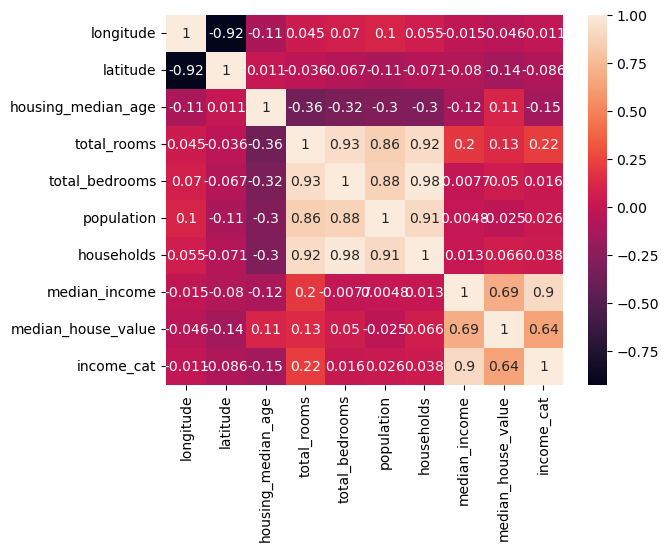

In [32]:
sns.heatmap(corr_matrix,annot=True)

In [33]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

Apparently houses with a lower bedroom/room ratio tend to be more expensive.

The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.


## preparing the data for machine learing algorithms 

In [34]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [35]:
## getting rid of the missing values

In [36]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [37]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [38]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [39]:
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

only the total_bedrooms attribute had missing values , but we cannot be sure that there wont be any missing values in new data after the system goes live , so it is safer to apply to all the numerical attributes 


In [40]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [41]:
## we can now use this trained imputer to transform the training set by replacing missing values by the learned medians

In [42]:
X=imputer.transform(housing_num)

housing_tr=pd.DataFrame(X,columns=housing_num.columns)


## handeling text and categorical attributes 

In [43]:
housing_cat = housing[["ocean_proximity"]]

In [44]:
## converting the ocean proximity into numerical values 

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [45]:
ordinal_encoder.categories_ 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Issue with Ordinal Encoding is that ML algorithms will assume that two nearby values are more similar than two distant values.
This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1)
So, let's use One Hot Encoder in place

In [46]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [47]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

although scikit learn provides many useful transformers , you will need to write your own for tasks such as custom cleanup operation or combining specific attribuutes 



to create custom transformers we need to create 3 main methods , fit(), transform(), fit_transform()


we can get last one for free by simply adding trasformer mixin as a base Class



In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
roooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
            self.add_bedrooms_per_room=add_bedrooms_per_room

    
    def fit(self,X,y=None):
          return self
    
    def transform(self,X,y=None):
          rooms_per_household=X[:,roooms_ix]/X[:,household_ix]
          population_per_household=X[:,population_ix]/X[:,household_ix]


          if self.add_bedrooms_per_room:
                bedrooms_per_room=X[:,bedrooms_ix]/X[:,roooms_ix]
                return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
          
          else:
             return np.c_[X,rooms_per_household,population_per_household]
          
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

## Feature scaling 

we need to scale our features , since we can clearly notice , total number of rooms ranges from about 6 to 39320 , while median income from 0-15 note that scaling the target values 

**Transformation Pipelines**

we can do feature scaling using min-max scaling or standardization 



In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

housing_num_tr=num_pipeline.fit_transform(housing_num)

In [50]:
## till now we have numerical and categorical columns seperately 

## to make it more convenient we make a single tranformer to handle all columns , applying the appropriate tranformations to each column 

## in scikit-learn introduced the column Transformer for this purpose 






In [51]:
from sklearn.compose import ColumnTransformer
num_attribus=list(housing_num)
cat_atttribus=["ocean_proximity"]

full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribus),
    ("cat",OneHotEncoder(),cat_atttribus),
])

housing_prepared=full_pipeline.fit_transform(housing)

## selecting and training the model 

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)




,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

some_data_prepared=full_pipeline.transform(some_data)

print("predictions:",lin_reg.predict(some_data_prepared))

print("Labels:",list(some_labels))


predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


lets measure this regression model's RMSE on the whole training seet using scikit-learn's mean_squared_error

In [55]:
from sklearn.metrics import mean_squared_error 
housing_predictions=lin_reg.predict(housing_prepared)

lin_mse=mean_squared_error(housing_labels,housing_predictions)

lin_rmse=np.sqrt(lin_mse)

print("RMSE:",lin_rmse)
print('R-Squared',lin_reg.score(housing_prepared,housing_labels))

RMSE: 68627.87390018745
R-Squared 0.6481553634454353


In [56]:
housing_labels.describe()

count     16512.000000
mean     207005.322372
std      115701.297250
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

Okay, this is better than nothing but clearly not a great score.
R-squared nearer to 1 better is our model.
This is an example of a model underfitting the training.


**using a more powerful Model**

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [58]:
housing_predictions=tree_reg.predict(housing_prepared)
dt_mse=mean_squared_error(housing_labels,housing_predictions)

dt_rmse=np.sqrt(dt_mse)
print("RMSE:",dt_rmse)
print("R-Squared:",tree_reg.score(housing_prepared,housing_labels))

RMSE: 0.0
R-Squared: 1.0


we see the model gives R-squared =1 , it is likely overfitting ,so we will do better evaluation 

**Better Evaluation Usin Cross-Validation**
<ul>
<li>We will use K-fold Cross Validation to Reduce Overfitting and Better Evaluate the Model.</li>
<li>We will use Scikit-Learn’s K-fold cross-validation feature.</li>
<li>The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds.</li>
<li>The result is an array containing the 10 evaluation scores</li>
</ul>

In [59]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)


tree_rmse_scores=np.sqrt(-scores)

Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [60]:
print(tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

[72053.88462972 70820.14901632 69770.40599132 70511.87394141
 69390.01327116 77370.65546999 70315.25782174 74338.87757099
 68484.3439755  70833.01836978]
Mean: 71388.84800579461
Standard deviation: 2500.636953173957


**The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.**

<li>
Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation).
</li>
<li>
The Decision Tree has a score of approximately 71,407, generally ±2,439. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.
</li>